# CPTR 512 Programming in Data Analytics

Harvey Alférez, PhD

## Unit 3. Data engineering and data shaping

This presentation will show you how to use R to organize or wrangle data into a shape useful for analysis. Data shaping is a set of steps you have to take if your data is not found all in one table or in an arrangement ready for analysis.

Source: Nina Zumel & John Mount (2020). Practical Data Science with R. Manning, second edition. ISBN: 9781617291562

Data engineer: A data engineer is an IT worker whose primary job is to prepare data for analytical or operational uses. https://www.techtarget.com/searchdatamanagement/definition/data-engineer

Data shaping: In most simple words, data shaping is the process of consolidation of the data, BEFORE it becomes part of your data model. The key thing to keep in mind is the word: BEFORE! So, one would perform data shaping before the data goes into the report itself. https://towardsdatascience.com/power-bi-101-data-shaping-in-a-nutshell-1df4681bdfd3

## Data selection

In [2]:
#Subsetting rows and columns

library("ggplot2")
summary(iris)
help(iris)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


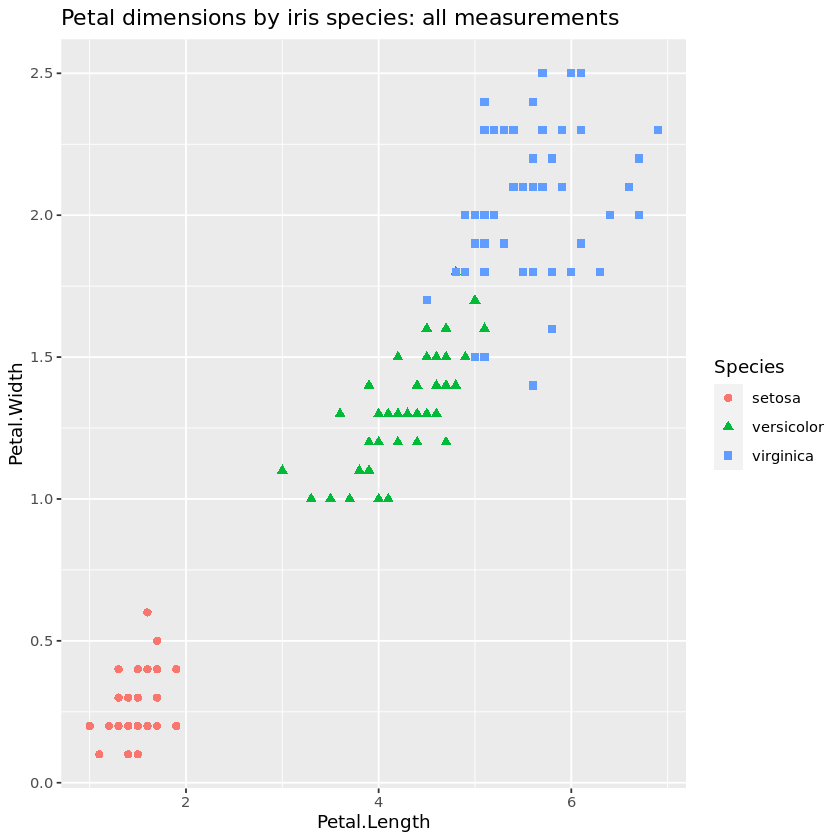

In [3]:
head(iris)
ggplot(iris, aes(x = Petal.Length, y = Petal.Width, shape = Species, color = Species)) + geom_point(size =2 ) +
ggtitle("Petal dimensions by iris species: all measurements")

Scenario:

Suppose we are assigned to generate a report on only petal length and petal width, by iris species, for irises where the petal length is greater than 2. To accomplish this, we need to select a subset of columns (variables) or a subset of rows (instances) from a data frame.

In [3]:
rows_we_want <- iris$Petal.Length > 2
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [4]:
columns_we_want <- c("Petal.Length", "Petal.Width", "Species")
iris_base <- iris[rows_we_want, columns_we_want]
# after
head(iris_base)

,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<fct>
51,4.7,1.4,versicolor
52,4.5,1.5,versicolor
53,4.9,1.5,versicolor
54,4.0,1.3,versicolor
55,4.6,1.5,versicolor
56,4.5,1.3,versicolor


Extra credit: 

Explain your solution to this problem using data.table and DPLYR.

- data.table is an R package that provides an enhanced version of data.frames, which are the standard data structure for storing data in base R. https://cran.r-project.org/web/packages/data.table/vignettes/datatable-intro.html

- dplyr is a grammar of data manipulation, providing a consistent set of verbs that help you solve the most common data manipulation challenges: mutate(), select(), filter(), summarise(), and arrange(). https://dplyr.tidyverse.org

## Removing records with incomplete data

In [3]:
library("ggplot2")
data(msleep)
str(msleep) #The msleep dataset of sleep times of animals with different characteristics

help(msleep)

tibble [83 × 11] (S3: tbl_df/tbl/data.frame)
 $ name        : chr [1:83] "Cheetah" "Owl monkey" "Mountain beaver" "Greater short-tailed shrew" ...
 $ genus       : chr [1:83] "Acinonyx" "Aotus" "Aplodontia" "Blarina" ...
 $ vore        : chr [1:83] "carni" "omni" "herbi" "omni" ...
 $ order       : chr [1:83] "Carnivora" "Primates" "Rodentia" "Soricomorpha" ...
 $ conservation: chr [1:83] "lc" NA "nt" "lc" ...
 $ sleep_total : num [1:83] 12.1 17 14.4 14.9 4 14.4 8.7 7 10.1 3 ...
 $ sleep_rem   : num [1:83] NA 1.8 2.4 2.3 0.7 2.2 1.4 NA 2.9 NA ...
 $ sleep_cycle : num [1:83] NA NA NA 0.133 0.667 ...
 $ awake       : num [1:83] 11.9 7 9.6 9.1 20 9.6 15.3 17 13.9 21 ...
 $ brainwt     : num [1:83] NA 0.0155 NA 0.00029 0.423 NA NA NA 0.07 0.0982 ...
 $ bodywt      : num [1:83] 50 0.48 1.35 0.019 600 ...


In [4]:
head(msleep)
summary(msleep)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50.000
Owl monkey,Aotus,omni,Primates,NA,17.0,1.8,NA,7.0,0.01550,0.480
Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.350
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.850


     name              genus               vore              order          
 Length:83          Length:83          Length:83          Length:83         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 conservation        sleep_total      sleep_rem      sleep_cycle    
 Length:83          Min.   : 1.90   Min.   :0.100   Min.   :0.1167  
 Class :character   1st Qu.: 7.85   1st Qu.:0.900   1st Qu.:0.1833  
 Mode  :character   Median :10.10   Median :1.500   Median :0.3333  
                    Mean   :10.43   Mean   :1.875   Mean   :0.4396  
                    3rd Qu.:13.75   3rd

‘mode’ is a mutually exclusive classification of objects according to their basic structure. The ‘atomic’ modes are numeric, complex, character,logical, lists.

‘class’ is a property assigned to an object that determines how to operate with it (e.g. matrix).

https://rpubs.com/kalipradeep/mode_vs_class 

In [7]:
#You can use the complete.cases() function in R to remove missing values in a vector, 
#matrix, or data frame.

#Use drop = FALSE if you are subsetting a matrix, array, or data frame and you want to preserve the 
#original dimensions. You should almost always use it when subsetting inside a function (e.g. you don't want 
#a data frame to become a 1-dimensional vector). 
#See a discussion on https://win-vector.com/2018/02/27/r-tip-use-drop-false-with-data-frames/

clean_base_1 <- msleep[complete.cases(msleep), , drop = FALSE]

head(clean_base_1)

summary(clean_base_1)

help(complete.cases)

name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
Cow,Bos,herbi,Artiodactyla,domesticated,4.0,0.7,0.6666667,20.0,0.42300,600.000
Dog,Canis,carni,Carnivora,domesticated,10.1,2.9,0.3333333,13.9,0.07000,14.000
Guinea pig,Cavis,herbi,Rodentia,domesticated,9.4,0.8,0.2166667,14.6,0.00550,0.728
Chinchilla,Chinchilla,herbi,Rodentia,domesticated,12.5,1.5,0.1166667,11.5,0.00640,0.420
Lesser short-tailed shrew,Cryptotis,omni,Soricomorpha,lc,9.1,1.4,0.1500000,14.9,0.00014,0.005


     name              genus               vore              order          
 Length:20          Length:20          Length:20          Length:20         
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 conservation        sleep_total       sleep_rem      sleep_cycle    
 Length:20          Min.   : 2.900   Min.   :0.600   Min.   :0.1167  
 Class :character   1st Qu.: 8.925   1st Qu.:1.300   1st Qu.:0.1792  
 Mode  :character   Median :11.300   Median :2.350   Median :0.2500  
                    Mean   :11.225   Mean   :2.275   Mean   :0.3458  
                    3rd Qu.:13.925   3rd Qu.:3.125   3rd Qu.:0.4167  
                    Max.   :19.700   Max.

In [15]:
nrow(clean_base_1)

[1] 20

In [16]:
clean_base_2 = na.omit(msleep)

In [17]:
nrow(clean_base_2)
#It was already cleaned (no NA values)

[1] 20

Extra credit:

Explain your solution to this problem using data.table and DPLYR.

## Ordering rows

In [2]:
purchases <- wrapr::build_frame(
"day", "hour", "n_purchase" | 1,9,5| 2,9,3| 2,11,5 | 1,13,1 | 2,13,3 | 1,14,1 )

order_index <- with(purchases, order(day, hour))
print(order_index) #order indexes starting from 1
purchases_ordered <- purchases[order_index, , drop = FALSE]
purchases_ordered$running_total <- cumsum(purchases_ordered$n_purchase) 
purchases_ordered

[1] 1 4 6 2 3 5


,day,hour,n_purchase,running_total
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,9,5,5
4,1,13,1,6
6,1,14,1,7
2,2,9,3,10
3,2,11,5,15
5,2,13,3,18


In [9]:
#data.table solution
library("data.table")
DT_purchases <- as.data.table(purchases)
order_cols <- c("day", "hour")
setorderv(DT_purchases, order_cols)
DT_purchases[ , running_total := cumsum(n_purchase)]
print(DT_purchases)

   day hour n_purchase running_total
1:   1    9          5             5
2:   1   13          1             6
3:   1   14          1             7
4:   2    9          3            10
5:   2   11          5            15
6:   2   13          3            18


For extra credit: explain the difference between setorder and setorderv. Which one is more efficient? Why?

In [4]:
#dplyr solution
#dplyr uses the word arrange to order data, and mutate to add a new column:
#install.packages("dplyr")
library("dplyr")
res <- purchases %>%
  arrange(., day, hour) %>%
  mutate(., running_total = cumsum(n_purchase))
print(res)


  day hour n_purchase running_total
1   1    9          5             5
2   1   13          1             6
3   1   14          1             7
4   2    9          3            10
5   2   11          5            15
6   2   13          3            18


## Adding new columns

In [39]:
library("datasets")
library("ggplot2")
summary(airquality) 
#We will use air quality measurements with missing data and non-standard date formatting for the year 1973

     Ozone           Solar.R           Wind             Temp      
 Min.   :  1.00   Min.   :  7.0   Min.   : 1.700   Min.   :56.00  
 1st Qu.: 18.00   1st Qu.:115.8   1st Qu.: 7.400   1st Qu.:72.00  
 Median : 31.50   Median :205.0   Median : 9.700   Median :79.00  
 Mean   : 42.13   Mean   :185.9   Mean   : 9.958   Mean   :77.88  
 3rd Qu.: 63.25   3rd Qu.:258.8   3rd Qu.:11.500   3rd Qu.:85.00  
 Max.   :168.00   Max.   :334.0   Max.   :20.700   Max.   :97.00  
 NA's   :37       NA's   :7                                       
     Month            Day      
 Min.   :5.000   Min.   : 1.0  
 1st Qu.:6.000   1st Qu.: 8.0  
 Median :7.000   Median :16.0  
 Mean   :6.993   Mean   :15.8  
 3rd Qu.:8.000   3rd Qu.:23.0  
 Max.   :9.000   Max.   :31.0  
                               

In [7]:
library("lubridate")
library("ggplot2")
# create a function to make the date string.
datestr = function(day, month, year) {
  paste(day, month, year, sep="-")
}

help(paste)

paste {base},R Documentation
...,"one or more R objects, to be converted to character vectors."
sep,a character string to separate the terms. Not NA_character_.
collapse,"an optional character string to separate the results. Not NA_character_. When collapse is a string, the result is always a string (character of length 1)."
recycle0,"logical indicating if zero-length character arguments should result in the zero-length character(0). Note that when collapse is a string, recycle0 does not recycle to zero-length, but to """"."


,Ozone,date
,<int>,<date>
1,41,1973-05-01
2,36,1973-05-02
3,12,1973-05-03
4,18,1973-05-04
5,NA,1973-05-05
6,28,1973-05-06


Warning message:
“Removed 37 rows containing missing values (geom_point).”


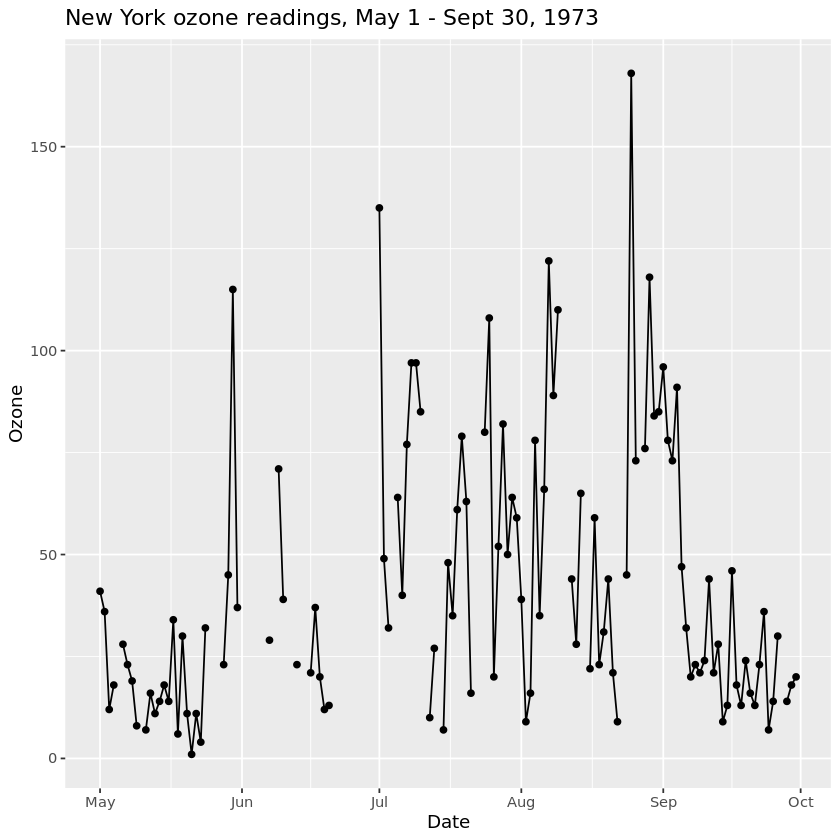

In [36]:
airquality_with_date <- airquality #Builds a copy of the data
#Adds the date column, using with () to refer to columns without needing the table name:
airquality_with_date$date <- with(airquality_with_date,
                                   dmy(datestr(Day, Month, 1973)))
airquality_with_date <- airquality_with_date[,
                                             c("Ozone", "date"),
                                             drop = FALSE] #Limits down to the columns of interest
head(airquality_with_date) #Shows the results
ggplot(airquality_with_date, aes(x = date, y = Ozone)) +
  geom_point() +
  geom_line() +
  xlab("Date") +
  ggtitle("New York ozone readings, May 1 - Sept 30, 1973")

In [10]:
#dplyr solution
library("dplyr")
airquality_with_date2 <- airquality %>%
  mutate(., date = dmy(datestr(Day, Month, 1973))) %>%
  select(., Ozone, date)


airquality_new <- mutate(airquality, date = dmy(datestr(Day, Month, 1973)))
airquality_new <- select(airquality_new, Ozone, date)

print("Pipeline Method")
head(airquality_with_date2)
print("Reassignment Method")
head(airquality_new)

[1] "Pipeline Method"


,Ozone,date
,<int>,<date>
1,41,1973-05-01
2,36,1973-05-02
3,12,1973-05-03
4,18,1973-05-04
5,NA,1973-05-05
6,28,1973-05-06


[1] "Reassignment Method"


,Ozone,date
,<int>,<date>
1,41,1973-05-01
2,36,1973-05-02
3,12,1973-05-03
4,18,1973-05-04
5,NA,1973-05-05
6,28,1973-05-06


## Renaming columns names

In [51]:
d <- data.frame(x = 1:2, y = 3:4)
print(d)
colnames(d) <- c("BIGX", "BIGY") 
print(d)

  x y
1 1 3
2 2 4
  BIGX BIGY
1    1    3
2    2    4


## Aggregating transforms

In [54]:
#Combining many rows into summary rows
#Scenario: We have been asked to make a report summarizing iris petals by species.

library("datasets")
library("ggplot2")
head(iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


     Species Petal.Length Petal.Width
1     setosa        1.462       0.246
2 versicolor        4.260       1.326
3  virginica        5.552       2.026


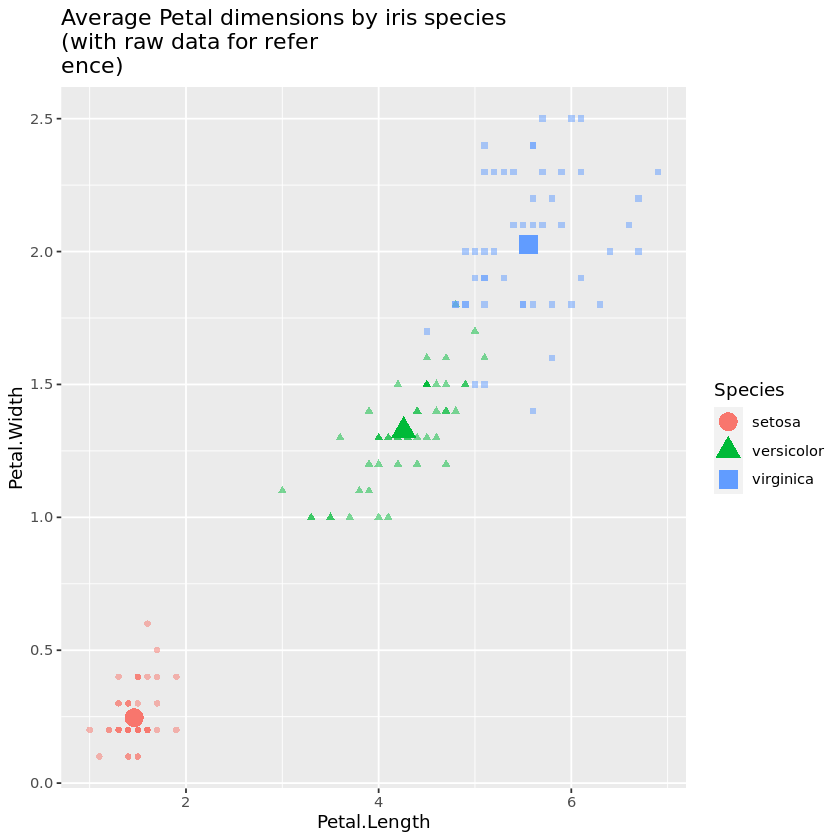

In [11]:
iris_summary <- aggregate(
  cbind(Petal.Length, Petal.Width) ~ Species,
  data = iris,
  FUN = mean)
#aggregate: Splits the data into subsets (e.g. species (setosa, versicolor, and virginica), 
#computes summary statistics for each, and returns the result in a convenient form.
#cbind: Takes a sequence of vector, matrix or data-frame arguments and combines by columns 
#(petal.length and petal.width)
print(iris_summary)

ggplot(mapping = aes(x = Petal.Length, y = Petal.Width,
                     shape = Species, color = Species)) +
  geom_point(data = iris, # raw data
             alpha = 0.5) +
  geom_point(data = iris_summary, # per-group summaries
             size = 5) +
  ggtitle("Average Petal dimensions by iris species\n(with raw data for refer
ence)")

## Multitable data transforms

In [1]:
#Combining two or more ordered data frames quickly

productTable <- wrapr::build_frame(
           "productID", "price" |
"p1" , 9.99 |
"p2" , 16.29 |
"p3" , 19.99 |
"p4" , 5.49 |
"p5" , 24.49 )
        salesTable <- wrapr::build_frame(
           "productID", "sold_store", "sold_online" |
"p1" ,6 ,64 |
"p2" ,31 ,1 |
"p3" ,30 ,23 |
"p4" ,31 ,67 |
"p5" ,43 ,51 )
productTable2 <- wrapr::build_frame( "productID", "price" |
"n1" ,25.49 |
"n2" , 33.99 |
"n3" , 17.99)

productTable$productID <- factor(productTable$productID) #factor = category
print(productTable)
productTable2$productID <- factor(productTable2$productID) 
print(productTable2)

#PROBLEM 1: APPENDING ROWS
#When two tables have the exact same column structure, we can concatenate them to get a larger table.

#Base R solution
rbind_base = rbind(productTable,productTable2)
str(rbind_base)
rbind_base

  productID price
1        p1  9.99
2        p2 16.29
3        p3 19.99
4        p4  5.49
5        p5 24.49
  productID price
1        n1 25.49
2        n2 33.99
3        n3 17.99
'data.frame':	8 obs. of  2 variables:
 $ productID: Factor w/ 8 levels "p1","p2","p3",..: 1 2 3 4 5 6 7 8
 $ price    : num  9.99 16.29 19.99 5.49 24.49 ...


productID,price
<fct>,<dbl>
p1,9.99
p2,16.29
p3,19.99
p4,5.49
p5,24.49
n1,25.49
n2,33.99
n3,17.99


In [2]:
#data.table solution
library("data.table")
rbindlist(list(productTable, productTable2))

productID,price
<fct>,<dbl>
p1,9.99
p2,16.29
p3,19.99
p4,5.49
p5,24.49
n1,25.49
n2,33.99
n3,17.99


In [3]:
#PROBLEM 2: SPLITTING TABLES

# add an extra column telling us which table
# each row comes from
productTable_marked <- productTable
productTable_marked$table <- "productTable"

productTable2_marked <- productTable2
productTable2_marked$table <- "productTable2"
# combine the tables
rbind_base <- rbind(productTable_marked,
productTable2_marked)
rbind_base

productID,price,table
<fct>,<dbl>,<chr>
p1,9.99,productTable
p2,16.29,productTable
p3,19.99,productTable
p4,5.49,productTable
p5,24.49,productTable
n1,25.49,productTable2
n2,33.99,productTable2
n3,17.99,productTable2


In [5]:
#PROBLEM 3: APPENDING COLUMNS

cbind
cbind(productTable, salesTable[, -1])

#What does [, -1] does? extra credit

function (..., deparse.level = 1) 
.Internal(cbind(deparse.level, ...))
<bytecode: 0x55a9590a8cb0>
<environment: namespace:base>

productID,price,productID,sold_store,sold_online
<fct>,<dbl>,<chr>,<dbl>,<dbl>
p1,9.99,p1,6,64
p2,16.29,p2,31,1
p3,19.99,p3,30,23
p4,5.49,p4,31,67
p5,24.49,p5,43,51


## Reshaping data

See additional details at: https://rafalab.github.io/dsbook/r-basics.html

### Pivot longer

One of the most used functions in the tidyr package is pivot_longer, which is useful for converting wide data into tidy data.

As with most tidyverse functions, the pivot_longer function’s first argument is the data frame that will be converted. Here we want to reshape the wide_data dataset so that each row represents a fertility observation, which implies we need three columns to store the year, country, and the observed value. In its current form, data from different years are in different columns with the year values stored in the column names. Through the names_to and values_to argument we will tell pivot_longer the column names we want to assign to the columns containing the current column names and observations, respectively. The default names are name and value, which are often usable choices. In this case a better choice for these two arguments would be year and fertility. Note that nowhere in the data file does it tell us this is fertility data. Instead, we deciphered this from the file name. Through cols, the second argument we specify the columns containing observed values; these are the columns that will be pivoted. The default is to pivot all columns so, in most cases, we have to specify the columns. In our example we want columns 1960, 1961 up to 2015.

The code to pivot the fertility data therefore looks like this:

In [25]:
#We will use the fertility wide format dataset
#install.packages("dslabs")
library(tidyverse) 
library(dslabs)
path <- system.file("extdata", package="dslabs")
filename <- file.path(path, "fertility-two-countries-example.csv")
wide_data <- read_csv(filename)

head(wide_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
✔ purrr   0.3.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::between()         masks data.table::between()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ dplyr::first()           masks data.table::first()
✖ lubridate::hour()        masks data.table::hour()
✖ lubridate::intersect()   masks base::intersect()
✖ lubridate::isoweek()     masks data.table::isoweek()
✖ dplyr::lag()             masks stats::lag()
✖ dplyr::last()            masks data.table::last()
✖ lubridate::mday()        masks data.table::mday()
✖ lubridate::minute()      masks data.table::minute()
✖ lubridate::month()       masks data.table::month()
✖ lubridate::quarter()     masks data.

country,1960,1961,1962,1963,1964,1965,1966,1967,1968,⋯,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37,2.28,⋯,1.36,1.36,1.37,1.38,1.39,1.40,1.41,1.42,1.43,1.44
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85,4.73,⋯,1.20,1.21,1.23,1.25,1.27,1.29,1.30,1.32,1.34,1.36


In [26]:
new_tidy_data <- pivot_longer(wide_data, `1960`:`2015`, names_to = "year", values_to = "fertility")

#names_to: A character vector specifying the new column or columns to create from the information 
#stored in the column names of data specified by cols.

#values_to: A string specifying the name of the column to create from the data stored in cell values. 

In [31]:
#We can see that the data have been converted to tidy format with columns year and fertility:

new_tidy_data

country,year,fertility
<chr>,<chr>,<dbl>
Germany,1960,2.41
Germany,1961,2.44
Germany,1962,2.47
Germany,1963,2.49
Germany,1964,2.49
Germany,1965,2.48
Germany,1966,2.44
Germany,1967,2.37
Germany,1968,2.28


### Pivot wider

The pivot_wider function is basically the inverse of pivot_longer

In [34]:
new_wide_data <- new_tidy_data %>% 
  pivot_wider(names_from = year, values_from = fertility)
select(new_wide_data, country, "1960":"1967")

country,1960,1961,1962,1963,1964,1965,1966,1967
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Germany,2.41,2.44,2.47,2.49,2.49,2.48,2.44,2.37
South Korea,6.16,5.99,5.79,5.57,5.36,5.16,4.99,4.85
